## Load Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
plt.style.use("dark_background")

## Load The Dataset

In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df=shuffle(df,random_state=100).reset_index(drop=True)

In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.dropna(axis=1,inplace=True)

In [8]:
df.shape

(569, 32)

In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
encoder=LabelEncoder()
df['diagnosis']=encoder.fit_transform(df['diagnosis'])

In [11]:
x=df.drop('diagnosis',axis=1)

In [12]:
y=df['diagnosis'].values

In [13]:
pca=PCA(n_components=2)
x=pca.fit_transform(x)

In [14]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100)

In [16]:
classifier=KNeighborsClassifier()

In [17]:
para={'n_neighbors':range(3,15),'metric':['minkowski','manhattan','euclidean']}
clf=GridSearchCV(classifier,para,cv=10,scoring='accuracy')
clf.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(3, 15)},
             scoring='accuracy')

In [18]:
clf.best_score_

0.9230434782608695

In [19]:
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [20]:
classifier = KNeighborsClassifier(n_neighbors=11,metric='manhattan')
classifier.fit(train_x,train_y)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [21]:
classifier.score(train_x,train_y)

0.9296703296703297

In [22]:
p=classifier.predict(test_x)

In [23]:
accuracy_score(p,test_y)

0.9649122807017544

In [24]:
cr=classification_report(p,test_y)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        79
           1       0.90      1.00      0.95        35

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [25]:
cm=confusion_matrix(p,test_y)
cm

array([[75,  4],
       [ 0, 35]])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 432x432 with 0 Axes>

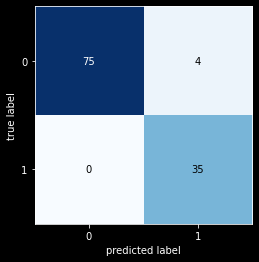

In [26]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm)